In [20]:
import ROOT
fin = ROOT.TFile.Open("../../outputs/rootfiles/modules/test.root","Read")

S1 = "mXX-100_mA-0p25_lxy-300"
S2 = "mXX-500_mA-0p25_lxy-300"
S3 = "mXX-500_mA-1p2_lxy-300"
S4 = "mXX-1000_mA-5_lxy-300"

ch = ["2mu2e","4mu"]

samples = [S1, S2, S3, S4]
colors = [1,2,3,4,5,6,7]
markers = [8,4,3,21,22,23]

### As a test this shows the number of muons in each muon collection

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


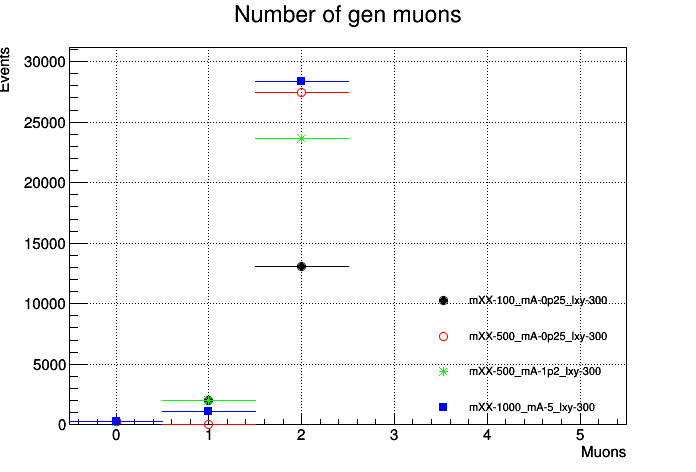

In [27]:
can = ROOT.TCanvas("can","can")
can.SetGrid(1,1)
can.cd()
leg = ROOT.TLegend (.6, .1, 0.9, .4)
#leg.SetHeader( "C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["ngen", "npf", "ndsa", "nreco"]

maxb = 0
for j, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htod[0])
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy

for i,sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htod[0]) 
    hist.SetStats(0)
    hist.SetAxisRange(0., maxb + maxb*0.1,"Y")
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("Number of gen muons; Muons; Events")
    leg.AddEntry(hist, sam, "p")
    hist.Draw("same")

leg.Draw()
can.Draw()

This makes more sense. <br>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: ngen
Warning in <TCanvas::Constructor>: Deleting canvas with same name: npf
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ndsa
Warning in <TCanvas::Constructor>: Deleting canvas with same name: nreco


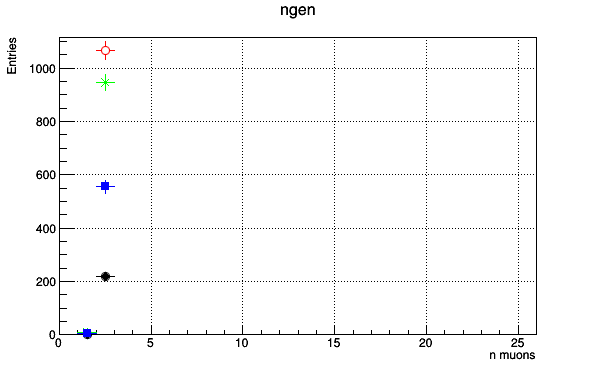

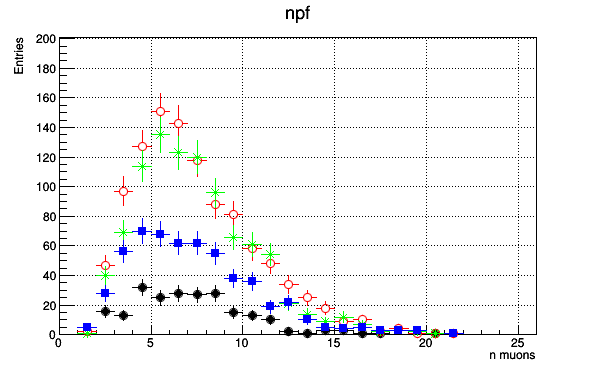

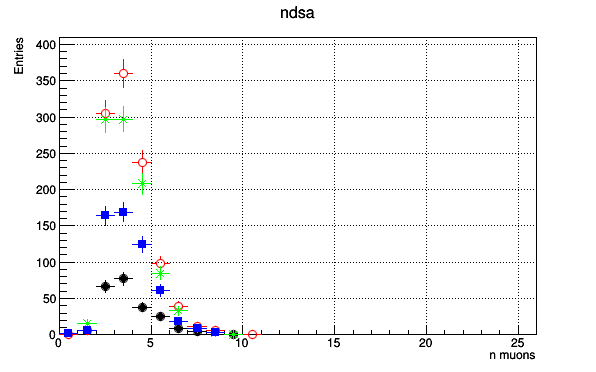

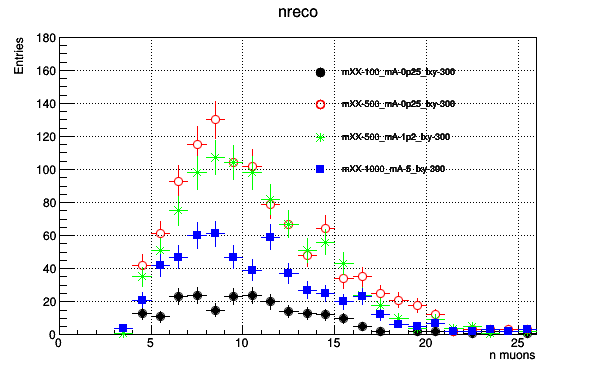

In [73]:
htod = ["ngen", "npf", "ndsa", "nreco"]

for i, h in enumerate(htod):
    can = ROOT.TCanvas(htod[i],htod[i], 600, 400)
    can.SetGrid(1,1)
    can.cd()
    leg = ROOT.TLegend (.5, .5, 0.8, .85)
    #leg.SetHeader("C")
    leg.SetBorderSize(0)
    leg.SetFillStyle(0)
    
    
    maxb = 0
    for j, sam in enumerate(samples):
        hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + h)
        maxy = hist.GetBinContent(hist.GetMaximumBin())
        if maxy > maxb:
            maxb = maxy
            
    for j, sam in enumerate(samples):
        hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + h)
        hist.SetStats(0)
        hist.SetAxisRange(0., 25.,"X")
        hist.SetAxisRange(0., maxb + 50,"Y")
        hist.SetLineColor(colors[j])
        hist.SetMarkerColor(colors[j])
        hist.SetMarkerStyle(markers[j])
        hist.SetTitle(htod[i])
        leg.AddEntry(hist, sam, "p")
        hist.Draw("same")
        leg.Draw("same")
    can.Draw()

Reco here is pf + dsa. <br>
The number of pf muons pick around 6 as shown by others in the group. Still there is something strange about all those values higher than 15

## Now the distibutions of pt for events only with two gen muons

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cnm


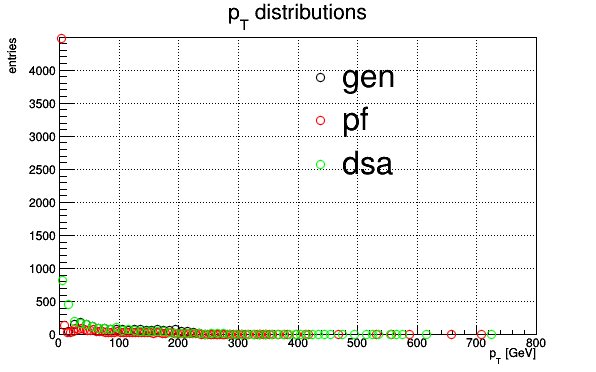

In [108]:
cnm = ROOT.TCanvas("cnm","cnm", 600, 400)
cnm.SetGrid(1,1)
cnm.cd()
leg = ROOT.TLegend (.5, .5, 0.8, .85)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["gen_pT", "pf_pT", "dsa_pT"]

maxb = 0
for i, h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + h)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy


for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + h)
    hist.SetStats(0)
    hist.SetAxisRange(0., maxb+25,"Y")
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(4)
    hist.SetTitle("p_{T} distributions; p_{T} [GeV]; entries")
    leg.AddEntry(hist, h[:-3], "p")
    hist.Draw("same")

leg.Draw()
cnm.Draw()

Distributions of reco and gen $\mu$ $p_T$. Gen muons only reached a $p_T ~ 330$ while pf and dsa muons go up to 700 

This is now for the two reco muons matched to the gen muons

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cnm


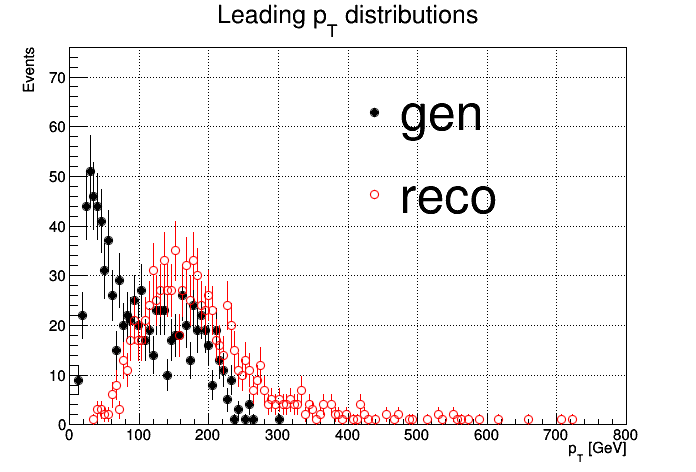

In [80]:
cnm = ROOT.TCanvas("cnm","cnm")
cnm.SetGrid(1,1)
cnm.cd()
leg = ROOT.TLegend (.5, .5, 0.8, .85)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["lgen_pT", "lreco_pT"]

maxb = 0
for i, h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + h)
    maxy = hist.GetBinContent(hist.GetMaximumBin())
    if maxy > maxb:
        maxb = maxy

for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + h)
    hist.SetAxisRange(0., maxb+ 25.,"Y")
    hist.SetStats(0)
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("Leading p_{T} distributions; p_{T} [GeV]; Events")
    leg.AddEntry(hist, h[1:-3], "p")
    hist.Draw("same")

leg.Draw()
cnm.Draw()

Should this muons be on top of each other if they are truly matched ( the same)

### First look at an efficiency.

# $\epsilon = \frac{\text{Events with both gen muons matched to reco muons}}{\text{Total events with 2 gen muons}}$
<br>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


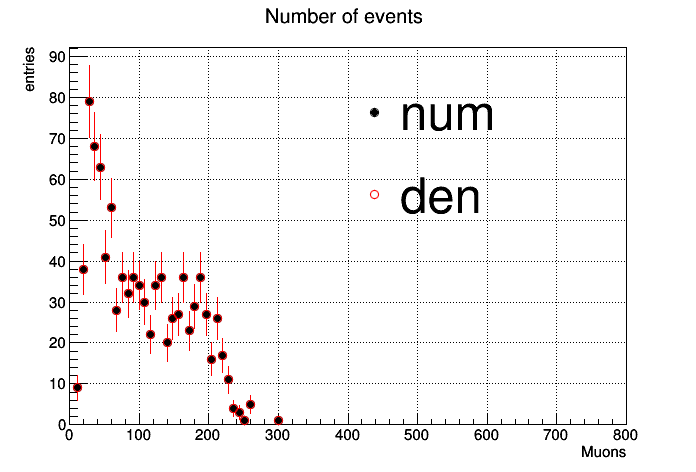

In [81]:
can = ROOT.TCanvas("can","can")
can.SetGrid(1,1)
can.cd()
leg = ROOT.TLegend (.5, .5, 0.8, .85)
#leg.SetHeader("C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["eff_num", "eff_den"]

for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + h) 
    hist.SetStats(0)
    hist.SetTitle("p_{T} distributions for Num and Den; p_{T} [GeV]; entries")
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("Number of events; Muons; entries")
    leg.AddEntry(hist, h[4:], "p")
    hist.Draw("same")

leg.Draw()
can.Draw()




Warning in <TCanvas::Constructor>: Deleting canvas with same name: cx


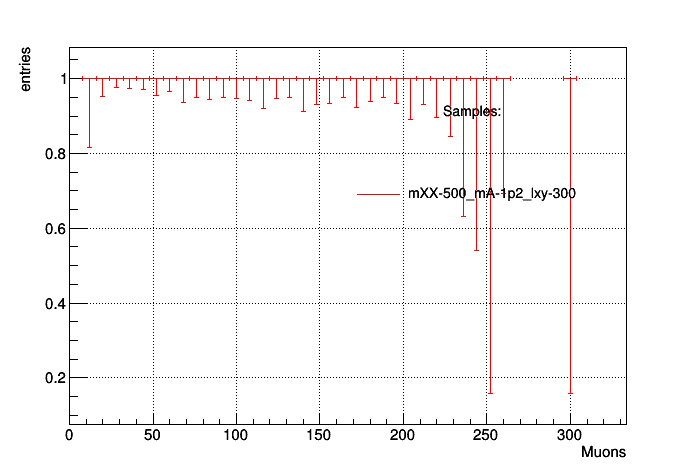

In [82]:
leg1 = ROOT.TLegend (.5, .5, 0.85, .85)
leg1.SetHeader("Samples:","C");
leg1.SetBorderSize(0)
leg1.SetFillStyle(0)

cx = ROOT.TCanvas("cx","cx")
cx.SetGrid(1,1)
cx.cd()

#for i, h in enumerate(samples):
num = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + htod[0])
den = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + htod[1])
eff = ROOT.TEfficiency(num, den)
eff.SetLineColor(ROOT.kRed)
eff.SetMarkerColor(ROOT.kRed)
leg1.AddEntry(eff, S3, "l")
eff.Draw()

leg1.Draw()
cx.Draw()

All events with 2 gen muons have two reco muons that matched to those within $\Delta R = 0.4$

# Looking now at trigger objects and trigger efficiency

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


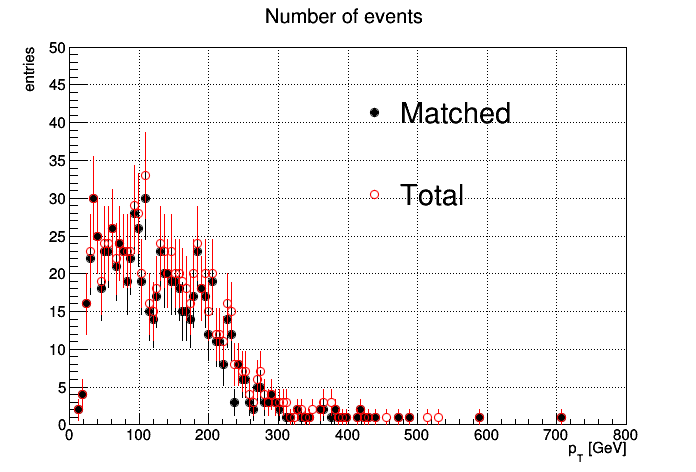

In [89]:
can = ROOT.TCanvas("can","can")
can.SetGrid(1,1)
can.cd()
leg = ROOT.TLegend (.5, .5, 0.8, .85)
#leg.SetHeader("C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["Matched_pT", "Total_pT"]

for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + h) 
    hist.SetStats(0)
    hist.SetAxisRange(0., 50.,"Y")
    hist.SetTitle("p_{T} distributions for Num and Den; p_{T} [GeV]; entries")
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("Number of events; p_{T} [GeV]; entries")
    leg.AddEntry(hist, h[:-3], "p")
    hist.Draw("same")

leg.Draw()
can.Draw()

# $\epsilon = \frac{\text{Events with both gen muons matched to reco muons}}{\text{Total events with 2 gen muons}}$
<br>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cx


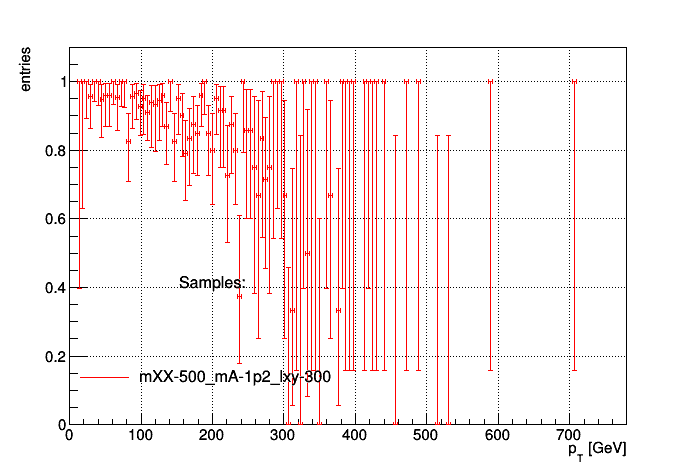

In [85]:
leg1 = ROOT.TLegend (.1, .1, 0.5, .5)
leg1.SetHeader("Samples:","C");
leg1.SetBorderSize(0)
leg1.SetFillStyle(0)

cx = ROOT.TCanvas("cx","cx")
cx.SetGrid(1,1)
cx.cd()

#for i, h in enumerate(samples):
num = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + "Matched_pT")
den = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + "Total_pT")
eff = ROOT.TEfficiency(num, den)
eff.SetLineColor(ROOT.kRed)
eff.SetMarkerColor(ROOT.kRed)
leg1.AddEntry(eff, S3, "l")
eff.Draw()

leg1.Draw()
cx.Draw()

# studying individuals collections
## event.muons

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


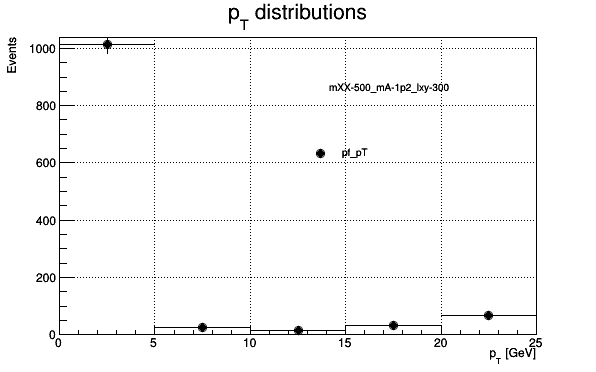

In [113]:
can = ROOT.TCanvas("can","can", 600, 400)
can.SetGrid(1,1)
can.cd()
leg = ROOT.TLegend (.5, .5, 0.8, .85)
leg.SetHeader(S3, "C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["pf_pT"]


for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + S1 + "/" + h) 
    hist.SetStats(0)
    hist.SetTitle("p_{T} distributions for pf muons; p_{T} [GeV]; entries")
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("p_{T} distributions; p_{T} [GeV]; Events")
    leg.AddEntry(hist, h[:], "p")
    hist.Draw("same")

leg.Draw()
can.Draw()

### Start plotting the $l_{xy}$ variables.  
First the $l_{xy}$ of the dark photon

Info in <TCanvas::Print>: png file Zd_lxy.png has been created


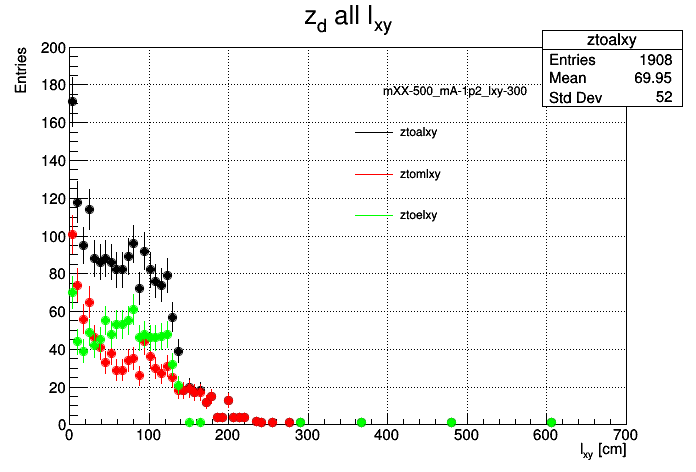

In [55]:
htoplot = ["ztoalxy", "ztomlxy", "ztoelxy"]

leg = ROOT.TLegend (.5, .5, 0.8, .85)
leg.SetHeader(S3,"C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)

c2 = ROOT.TCanvas("c2","c2")
c2.SetGrid(1,1)
c2.cd()

for i, hs in enumerate(htoplot):
    hist = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + hs)
    hist.SetAxisRange(0., 200.,"Y")
    #hist.GetXaxis().SetTitle("E [keV]");
    hist.SetMarkerColor(color[i])
    hist.SetLineColor(color[i])
    hist.SetMarkerColor(color[i])
    hist.Draw("same")
    leg.AddEntry(hist, hs, "l")
    
    
#ztoa.SetMarkerColor(ROOT.kRed)
#ztoa.SetLineColor(ROOT.kRed)
#ztoa.Draw("same")
#leg.AddEntry(ztoa, S3, "l")



#ztom.SetMarkerColor(ROOT.kRed)
#ztom.Draw("same")
#leg.AddEntry(ztom, S3, "l")

#ztoe.SetMarkerColor(ROOT.kGreen)
#ztoe.Draw("same")
#leg.AddEntry(ztoe, S3, "l")


leg.Draw()
c2.Draw()
c2.SaveAs('Zd_lxy.png')

All zd in the events decaying to either muons or electrons

Info in <TCanvas::Print>: png file Zd_lxy_allsamples.png has been created


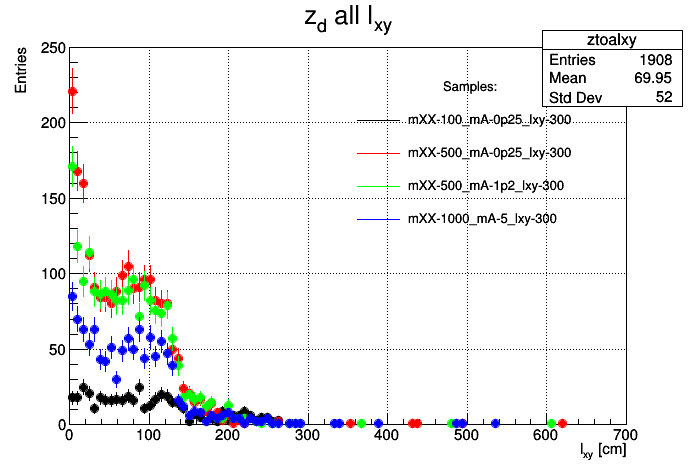

In [56]:
htoplot = ["ztoalxy", "ztomlxy", "ztoelxy"]

leg = ROOT.TLegend (.5, .5, 0.85, .85)
leg.SetHeader("Samples:","C");
leg.SetBorderSize(0)
leg.SetFillStyle(0)

c3 = ROOT.TCanvas("c3","c3")
c3.SetGrid(1,1)
c3.cd()

for i, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htoplot[0])
    hist.SetAxisRange(0., 250.,"Y")
    hist.SetMarkerColor(color[i])
    hist.SetLineColor(color[i])
    hist.SetMarkerColor(color[i])
 #   hist.SetMarkerStyle(ROOT.kRed)
    hist.Draw("same")
    leg.AddEntry(hist, sam, "l")

leg.Draw()
c3.Draw()
c3.SaveAs('Zd_lxy_allsamples.png')

Sort of make sense, we get an exponential decay as expected

Info in <TCanvas::Print>: png file mu_lxy.png has been created


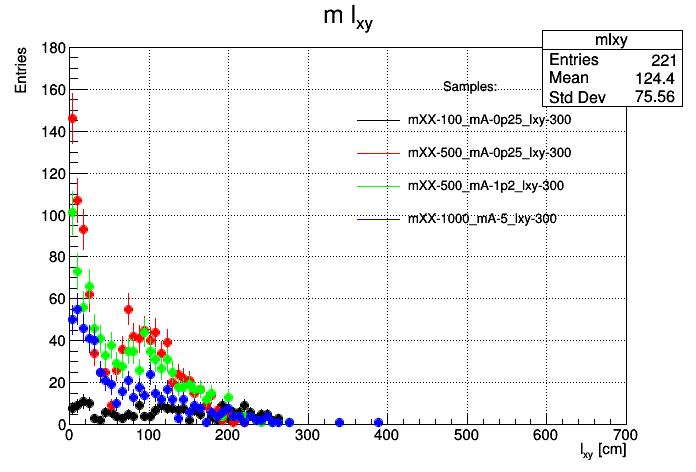

In [57]:
htoplot = ["mlxy", "elxy"]

leg = ROOT.TLegend (.5, .5, 0.85, .85)
leg.SetHeader("Samples:","C");
leg.SetBorderSize(0)
leg.SetFillStyle(0)

c4 = ROOT.TCanvas("c4","c4")
c4.SetGrid(1,1)
c4.cd()

for i, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/" + htoplot[0])
    hist.SetMarkerColor(color[i])
    hist.SetAxisRange(0., 180.,"Y")
    hist.SetLineColor(color[i])
    hist.SetMarkerColor(color[i])
 #   hist.SetMarkerStyle(ROOT.kRed)
    hist.Draw("same")
    leg.AddEntry(hist, sam, "l")

leg.Draw()
c4.Draw()
c4.SaveAs('mu_lxy.png')

Info in <TCanvas::Print>: png file ele_lxy.png has been created


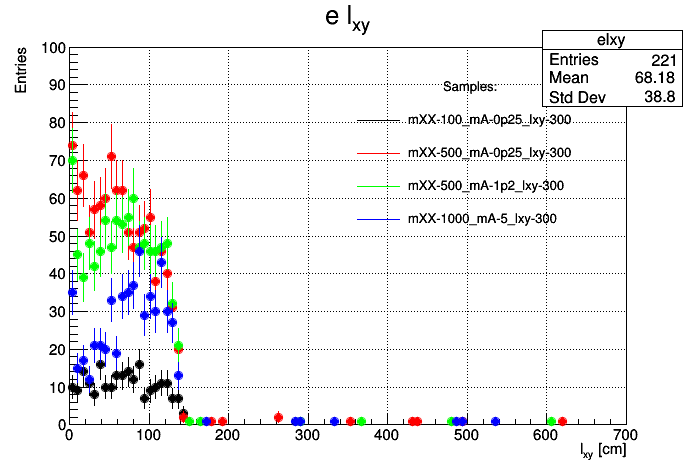

In [58]:
leg = ROOT.TLegend (.5, .5, 0.85, .85)
leg.SetHeader("Samples:","C");
leg.SetBorderSize(0)
leg.SetFillStyle(0)

c5 = ROOT.TCanvas("c5","c5")
c5.SetGrid(1,1)
c5.cd()

for i, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/elxy")
    hist.SetMarkerColor(color[i])
    hist.SetAxisRange(0., 100.,"Y")
    hist.SetLineColor(color[i])
    hist.SetMarkerColor(color[i])
 #   hist.SetMarkerStyle(ROOT.kRed)
    hist.Draw("same")
    leg.AddEntry(hist, sam, "l")

leg.Draw()
c5.Draw()
c5.SaveAs('ele_lxy.png')

In [59]:
leg = ROOT.TLegend (.5, .5, 0.85, .85)
leg.SetHeader("Samples:","C");
leg.SetBorderSize(0)
leg.SetFillStyle(0)

c6 = ROOT.TCanvas("c6","c6")
c6.SetGrid(1,1)
c6.cd()

for i, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/zzz")
    hist.SetMarkerColor(color[i])
    hist.SetAxisRange(0., 300.,"Y")
    hist.SetLineColor(color[i])
    hist.SetMarkerColor(color[i])
    hist.SetMarkerStyle(ROOT.kRed)
    hist.Draw("hist same")
    leg.AddEntry(hist, sam, "l")

leg.Draw()
c6.Draw()
#c6.SaveAs('ele_lxy.png')

AttributeError: 'TObject' object has no attribute 'SetMarkerColor'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c7


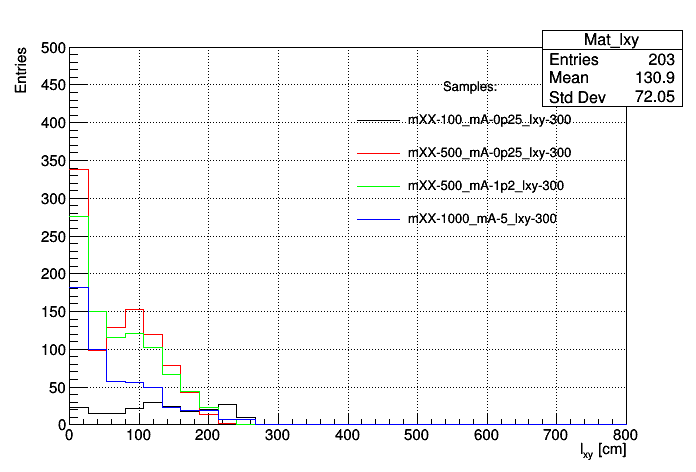

In [65]:
leg = ROOT.TLegend (.5, .5, 0.85, .85)
leg.SetHeader("Samples:","C");
leg.SetBorderSize(0)
leg.SetFillStyle(0)

c7 = ROOT.TCanvas("c7","c7")
c7.SetGrid(1,1)
c7.cd()

for i, sam in enumerate(samples):
    hist = fin.Get("ch" + ch[0] + "/sig/" + sam + "/Mat_lxy")
    hist.SetMarkerColor(color[i])
    hist.SetAxisRange(0., 500.,"Y")
    hist.SetLineColor(color[i])
    hist.SetMarkerColor(color[i])
    hist.SetMarkerStyle(ROOT.kRed)
    hist.Draw("hist same")
    leg.AddEntry(hist, sam, "l")

leg.Draw()
c7.Draw()

#c6.SaveAs('ele_lxy.png')

lxy efficiency now

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cx
Info in <TCanvas::Print>: png file efflxy.png has been created


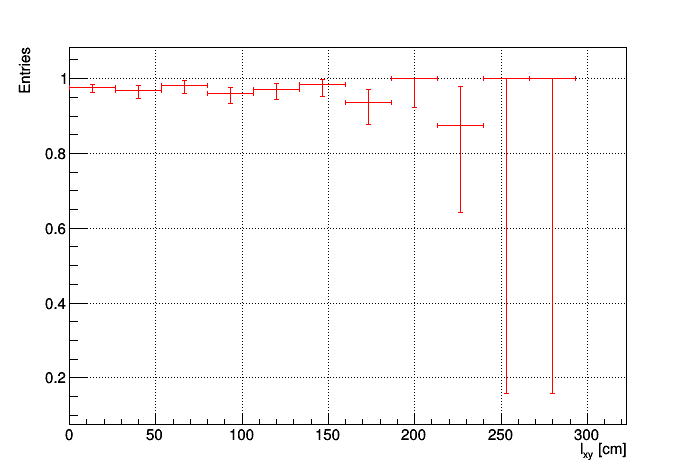

In [66]:
leg = ROOT.TLegend (.5, .5, 0.85, .85)
leg.SetHeader("Samples:","C");
leg.SetBorderSize(0)
leg.SetFillStyle(0)

cx = ROOT.TCanvas("cx","cx")
cx.SetGrid(1,1)
cx.cd()
#cx.Draw()

#for i, sam in enumerate(samples):
num = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/Mat_lxy")
den = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/Tot_lxy")
eff = ROOT.TEfficiency(num, den)
eff.SetLineColor(ROOT.kRed)
eff.SetMarkerColor(ROOT.kRed)
leg.AddEntry(eff, sam, "l")
eff.Draw()

#leg.Draw()
cx.Draw()
cx.SaveAs("efflxy.png")

#for i, sam in enumerate(samples):
 #   hnum = fin.Get("ch" + ch[0] + "/sig/" + sam + "/Mat_lxy")
  #  hden = fin.Get("ch" + ch[0] + "/sig/" + sam + "/Tot_lxy")
   # eff = ROOT.TEfficiency(hnum,hden)
    #eff = ROOT.TEfficiency(num, den)
    #h2.SetMarkerColor(color[i])
    #hist.SetAxisRange(0., 300.,"Y")
    #hist.SetLineColor(color[i])
    #hist.SetMarkerColor(color[i])
    #hist.SetMarkerStyle(ROOT.kRed)
    #eff.Draw("same")
    #eff.Draw("same")
    #leg.AddEntry(eff, sam, "l")

#leg.Draw()
#c_met.Draw()
#c6.SaveAs('ele_lxy.png')

In [ ]:
cnm = ROOT.TCanvas("cnm","cnm")
cnm.SetGrid(1,1)
cnm.cd()

leg = ROOT.TLegend (.5, .5, 0.8, .85)
#leg.SetHeader("C")
leg.SetBorderSize(0)
leg.SetFillStyle(0)

htod = ["ngen", "npf", "ndsa", "nreco"]

for i,h in enumerate(htod):
    hist = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + h) 
    hist.SetStats(0)
    hist.SetLineColor(colors[i])
    hist.SetMarkerColor(colors[i])
    hist.SetMarkerStyle(markers[i])
    hist.SetTitle("Number of muons; Muons; entries")
    leg.AddEntry(hist, h[1:], "p")
    hist.Draw("same")


'''ngen = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + "ngen")
ngen.SetStats(0)
ngen.SetTitle("Reco muon matched to gen muons; p_{T} [GeV]; entries")

leg.AddEntry(ngen, "gen", "p")

npf = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + "npf")
npf.SetStats(0)
npf.SetLineColor(2)
npf.SetMarkerColor(ROOT.kRed)
npf.SetMarkerStyle(ROOT.kStar)

leg.AddEntry(npf, "pf muos", "p")

ndsa = fin.Get("ch" + ch[0] + "/sig/" + S3 + "/" + "ndsa")
ndsa.SetLineColor(2)
ndsa.SetMarkerStyle(3)
ndsa.SetMarkerColor(ROOT.kBlue)
leg.AddEntry(ndsa, "dsa muos", "p")
ndsa.SetStats(0)


ngen.Draw("same")
npf.Draw("same")
ndsa.Draw("same")'''

leg.Draw()
cnm.Draw()